In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df_brazil = pd.read_excel(r'alldatasets.xlsx',sheet_name='Brazil')

In [3]:
df_brazil.head()

childid country  height  stunting_2cat  EDUYRS2   z_score  agegapr1  \
0     BR1  Brazil  180.35            0.0     16.0  0.399053       0.0   
1     BR2  Brazil  164.95            0.0     15.0  0.002132       NaN   
2     BR8  Brazil  167.10            1.0      5.0 -2.061853       6.0   
3    BR12  Brazil  174.75            0.0     13.0  1.351661       2.0   
4    BR14  Brazil  179.35            0.0     11.0  0.557821       NaN   

   momeduyrsr1  chsexr1  agemonr1  hhsizer1  wi_newr1  job_cat  pvt_sector  \
0          5.0        1      50.0       3.0  0.306352      3.0           1   
1          5.0        0      52.0       3.0  0.533106      3.0           1   
2          5.0        1      49.0      12.0  0.115514      3.0           1   
3          6.0        1      51.0       5.0  0.597647      3.0           1   
4         10.0        1      50.0       3.0  0.483788      3.0           1   

      earn_usd  
0   290.316010  
1   109.973544  
2   109.973544  
3  1060.838040  
4   353.612680

In [4]:
df_brazil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2398 entries, 0 to 2397
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   childid        2398 non-null   object 
 1   country        2398 non-null   object 
 2   height         2354 non-null   float64
 3   stunting_2cat  2140 non-null   float64
 4   EDUYRS2        2396 non-null   float64
 5   z_score        2378 non-null   float64
 6   agegapr1       1784 non-null   float64
 7   momeduyrsr1    2393 non-null   float64
 8   chsexr1        2398 non-null   int64  
 9   agemonr1       2143 non-null   float64
 10  hhsizer1       2192 non-null   float64
 11  wi_newr1       2187 non-null   float64
 12  job_cat        2396 non-null   float64
 13  pvt_sector     2398 non-null   int64  
 14  earn_usd       2398 non-null   float64
dtypes: float64(11), int64(2), object(2)
memory usage: 281.1+ KB


In [5]:
df_brazil.describe()

height  stunting_2cat      EDUYRS2      z_score     agegapr1  \
count  2354.000000    2140.000000  2396.000000  2378.000000  1784.000000   
mean    168.869180       0.103271    10.733932    -0.069707     4.492713   
std       9.094512       0.304384     3.818078     0.940789     4.051955   
min     138.500000       0.000000     0.000000    -3.570150     0.000000   
25%     161.750000       0.000000     8.000000    -0.791708     2.000000   
50%     169.100000       0.000000    11.000000    -0.077252     3.000000   
75%     175.650000       0.000000    13.500000     0.557821     6.000000   
max     196.100000       1.000000    21.000000     2.701190    31.000000   

       momeduyrsr1      chsexr1     agemonr1     hhsizer1     wi_newr1  \
count  2393.000000  2398.000000  2143.000000  2192.000000  2187.000000   
mean      6.181362     0.575897    43.106393     4.686588     0.491544   
std       3.847929     0.494309     3.676568     1.858736     0.183537   
min       0.000000     0.000000    35.000000     2.000000     0.000000   
25%       4.000000     0.000000    40.000000     3.000000     0.363159   
50%       5.000000     1.000000    43.000000     4.000000     0.494310   
75%       8.000000     1.000000    46.000000     5.000000     0.597647   
max      20.000000     1.000000    52.000000    17.000000     1.000000   

           job_cat  pvt_sector     earn_usd  
count  2396.000000      2398.0  2398.000000  
mean      2.839733         1.0   308.578527  
std       0.546180         0.0   442.847452  
min       1.000000         1.0     0.000000  
25%       3.000000         1.0   127.388968  
50%       3.000000         1.0   212.079205  
75%       3.000000         1.0   335.932046  
max       4.000000         1.0  8840.317000

In [6]:
df_brazil=df_brazil.astype({"chsexr1": 'object', "job_cat": 'object', "pvt_sector": 'object',"stunting_2cat": 'object'})

In [7]:
df_brazil.dtypes

childid           object
country           object
height           float64
stunting_2cat     object
EDUYRS2          float64
z_score          float64
agegapr1         float64
momeduyrsr1      float64
chsexr1           object
agemonr1         float64
hhsizer1         float64
wi_newr1         float64
job_cat           object
pvt_sector        object
earn_usd         float64
dtype: object

In [8]:
df_outlier=df_brazil.copy()

In [9]:
df_outlier.dtypes

childid           object
country           object
height           float64
stunting_2cat     object
EDUYRS2          float64
z_score          float64
agegapr1         float64
momeduyrsr1      float64
chsexr1           object
agemonr1         float64
hhsizer1         float64
wi_newr1         float64
job_cat           object
pvt_sector        object
earn_usd         float64
dtype: object

In [10]:
total = df_outlier.isnull().sum().sort_values(ascending=False)
percent = (df_outlier.isnull().sum()/df_outlier.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Missing Percent'])
missing_data['Missing Percent'] = missing_data['Missing Percent'].apply(lambda x: x * 100)
missing_data.loc[missing_data['Missing Percent'] > 95]

Empty DataFrame
Columns: [Total, Missing Percent]
Index: []

In [11]:
df_outlier=df_outlier.select_dtypes(include=['int64','floating'])

In [12]:
df_outlier.dtypes

height         float64
EDUYRS2        float64
z_score        float64
agegapr1       float64
momeduyrsr1    float64
agemonr1       float64
hhsizer1       float64
wi_newr1       float64
earn_usd       float64
dtype: object

In [13]:
import warnings

warnings.filterwarnings('ignore')

In [14]:
df_outlier.dtypes

height         float64
EDUYRS2        float64
z_score        float64
agegapr1       float64
momeduyrsr1    float64
agemonr1       float64
hhsizer1       float64
wi_newr1       float64
earn_usd       float64
dtype: object

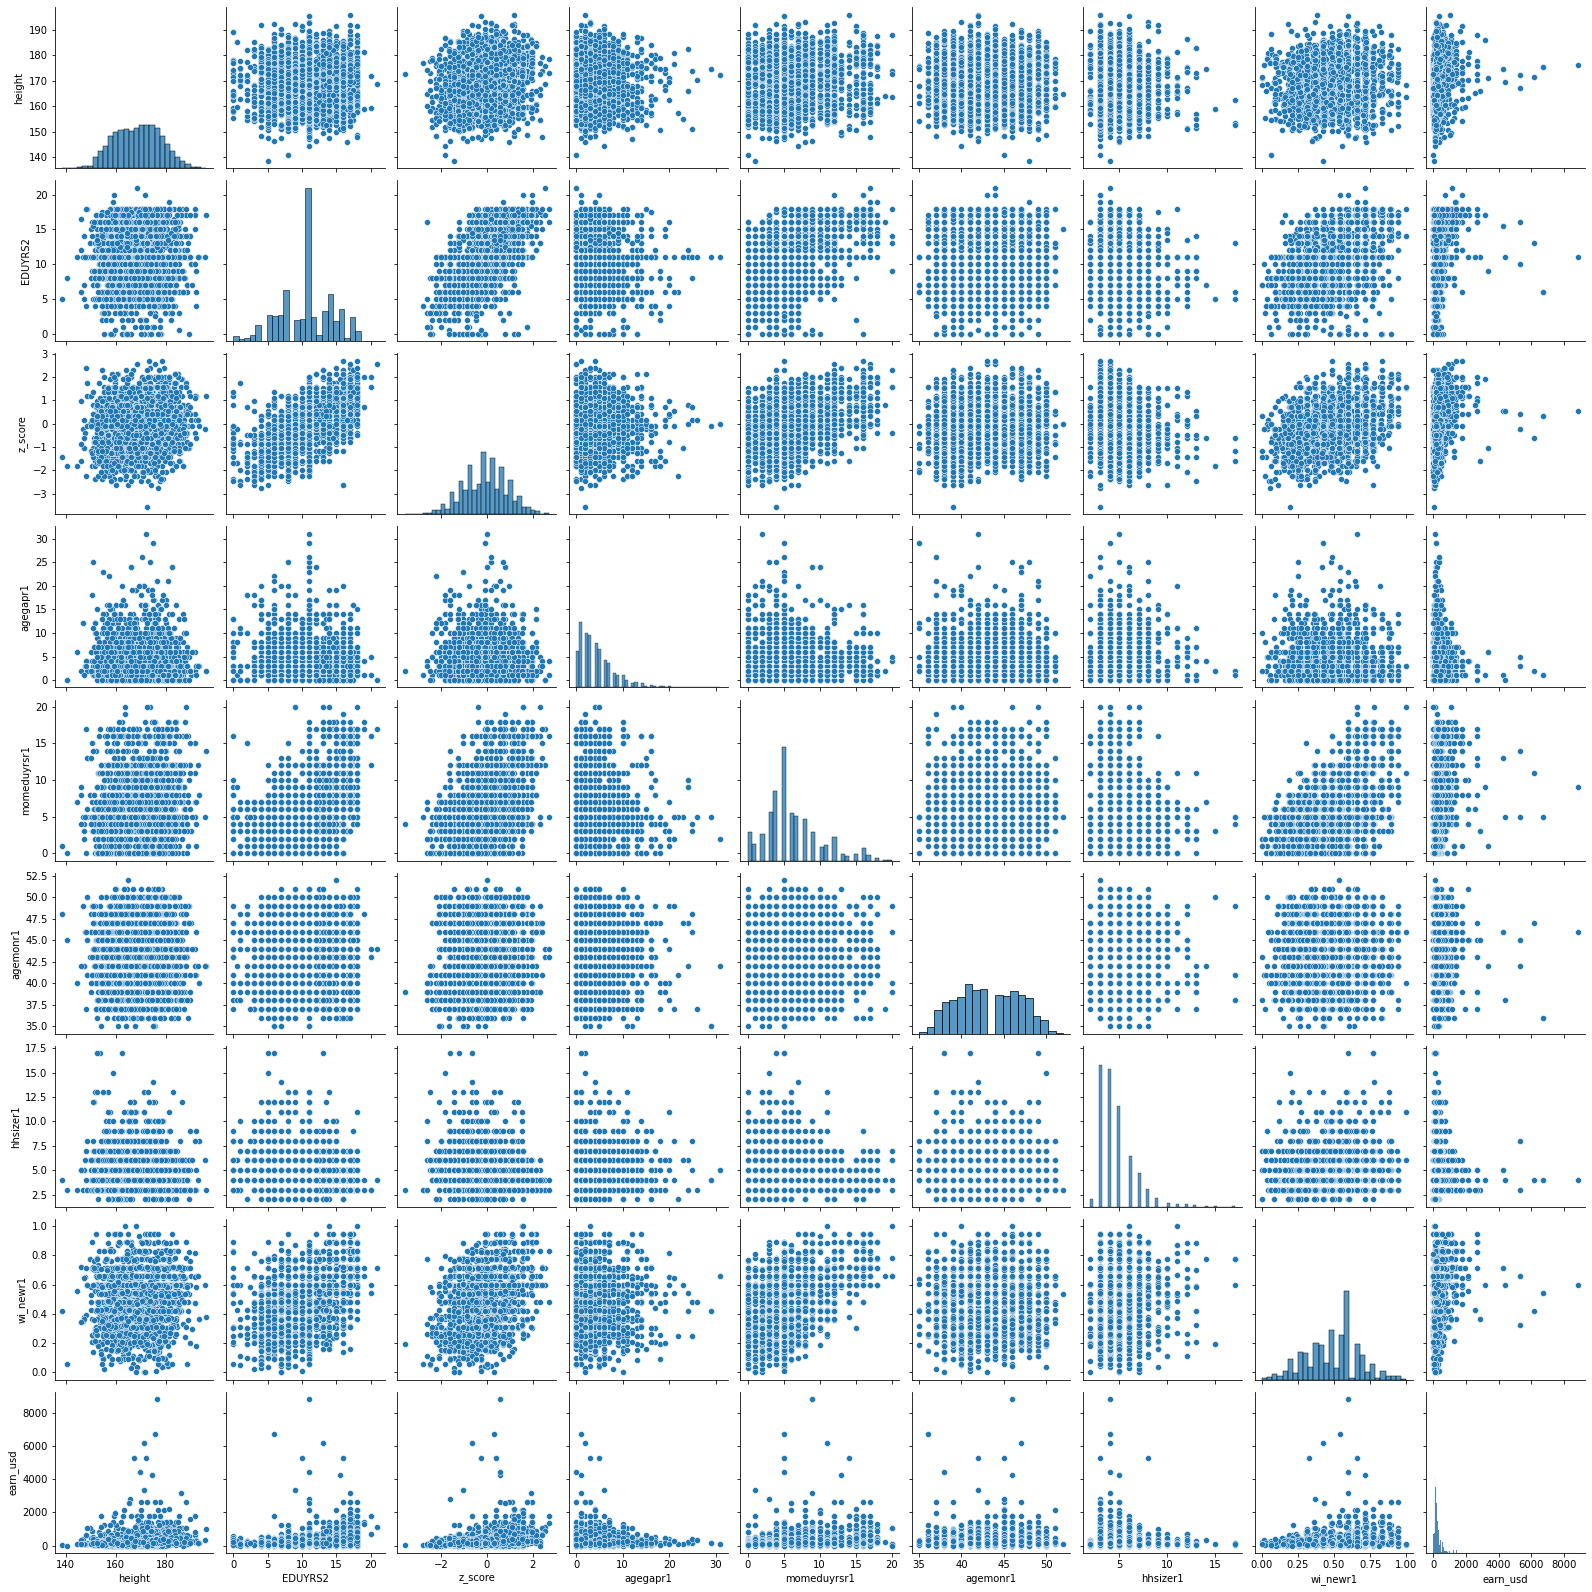

In [15]:
sns.pairplot(df_outlier)

# Outlier Cappping

In [16]:
def cap_data(df):
    for col in df.columns:
        print("capping the ",col)
        if (((df[col].dtype)=='float64') | ((df[col].dtype)=='int64') | ((df[col].dtype)=='float32')):
            percentiles = df[col].quantile([0.01,0.99]).values
            df[col][df[col] <= percentiles[0]] = percentiles[0]
            df[col][df[col] >= percentiles[1]] = percentiles[1]
        else:
            df[col]=df[col]
    return df



In [17]:
final_df=cap_data(df_outlier)

capping the  height
capping the  EDUYRS2
capping the  z_score
capping the  agegapr1
capping the  momeduyrsr1
capping the  agemonr1
capping the  hhsizer1
capping the  wi_newr1
capping the  earn_usd


In [18]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler

In [19]:
df_brazil=df_brazil.drop(['childid','country'],axis=1)

In [20]:
all_category_features=df_brazil.select_dtypes(include='object')

In [21]:
all_category_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2398 entries, 0 to 2397
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   stunting_2cat  2140 non-null   object
 1   chsexr1        2398 non-null   object
 2   job_cat        2396 non-null   object
 3   pvt_sector     2398 non-null   object
dtypes: object(4)
memory usage: 75.1+ KB


# KNN for Categories

In [22]:
mm = MinMaxScaler()

def find_category_mappings(df, variable):
    return {k: i for i, k in enumerate(df[variable].dropna().unique(), 0)}

def integer_encode(df , variable, ordinal_mapping):
    df[variable] = df[variable].map(ordinal_mapping)

mappin = dict()
def imputation(df1 , cols):
    df = df1.copy()
    #Encoding dict &amp; Removing nan    
    #mappin = dict()
    for variable in cols:
        mappings = find_category_mappings(df, variable)
        mappin[variable] = mappings

    #Apply mapping
    for variable in cols:
        integer_encode(df, variable, mappin[variable])  

    #Minmaxscaler and KNN imputation 
    sca = mm.fit_transform(df)
    knn_imputer = KNNImputer()
    knn = knn_imputer.fit_transform(sca)
    df.iloc[:,:] = mm.inverse_transform(knn)
    for i in df.columns : 
        df[i] = round(df[i]).astype('int')

    #Inverse transform
    for i in cols:
        inv_map = {v: k for k, v in mappin[i].items()}
        df[i] = df[i].map(inv_map)
    return df

In [23]:
df_cat_imp=imputation(all_category_features,['stunting_2cat','chsexr1','job_cat','pvt_sector'])

In [24]:
df_cat_imp.isnull().sum().sort_values(ascending = False)

pvt_sector       0
job_cat          0
chsexr1          0
stunting_2cat    0
dtype: int64

In [25]:
df_cat_imp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2398 entries, 0 to 2397
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   stunting_2cat  2398 non-null   float64
 1   chsexr1        2398 non-null   int64  
 2   job_cat        2398 non-null   float64
 3   pvt_sector     2398 non-null   int64  
dtypes: float64(2), int64(2)
memory usage: 75.1 KB


In [26]:
#df_cat_imp.to_csv(r'C:\Users\rramr\OneDrive\Desktop\Modern Scientist Global\Peru\df_knn_before.csv', encoding='utf-8', index=True)

In [27]:
#all_category_features=df_et.select_dtypes(include='o')

In [28]:
#cat_dummies = pd.get_dummies(all_category_features, dummy_na=True)
#cat_dummies.head()

# KNN for numerics

In [29]:
df_knn=final_df.copy()

In [30]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
df_num_imp = pd.DataFrame(imputer.fit_transform(df_knn),columns = df_knn.columns)

In [31]:
df_num_imp.head()

height  EDUYRS2   z_score  agegapr1  momeduyrsr1  agemonr1  hhsizer1  \
0  180.35     16.0  0.399053       0.0          5.0      50.0      3.00   
1  164.95     15.0  0.002132       3.0          5.0      50.0      3.00   
2  167.10      5.0 -2.061853       6.0          5.0      49.0     11.09   
3  174.75     13.0  1.351661       2.0          6.0      50.0      5.00   
4  179.35     11.0  0.557821       5.2         10.0      50.0      3.00   

   wi_newr1     earn_usd  
0  0.306352   290.316010  
1  0.533106   109.973544  
2  0.115514   109.973544  
3  0.597647  1060.838040  
4  0.483788   353.612680

In [32]:
df_outlier_concat = pd.concat([df_num_imp, df_cat_imp], axis=1)
df_outlier_concat.head()

height  EDUYRS2   z_score  agegapr1  momeduyrsr1  agemonr1  hhsizer1  \
0  180.35     16.0  0.399053       0.0          5.0      50.0      3.00   
1  164.95     15.0  0.002132       3.0          5.0      50.0      3.00   
2  167.10      5.0 -2.061853       6.0          5.0      49.0     11.09   
3  174.75     13.0  1.351661       2.0          6.0      50.0      5.00   
4  179.35     11.0  0.557821       5.2         10.0      50.0      3.00   

   wi_newr1     earn_usd  stunting_2cat  chsexr1  job_cat  pvt_sector  
0  0.306352   290.316010            0.0        1      3.0           1  
1  0.533106   109.973544            0.0        0      3.0           1  
2  0.115514   109.973544            1.0        1      3.0           1  
3  0.597647  1060.838040            0.0        1      3.0           1  
4  0.483788   353.612680            0.0        1      3.0           1

In [33]:
df_outlier_concat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2398 entries, 0 to 2397
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   height         2398 non-null   float64
 1   EDUYRS2        2398 non-null   float64
 2   z_score        2398 non-null   float64
 3   agegapr1       2398 non-null   float64
 4   momeduyrsr1    2398 non-null   float64
 5   agemonr1       2398 non-null   float64
 6   hhsizer1       2398 non-null   float64
 7   wi_newr1       2398 non-null   float64
 8   earn_usd       2398 non-null   float64
 9   stunting_2cat  2398 non-null   float64
 10  chsexr1        2398 non-null   int64  
 11  job_cat        2398 non-null   float64
 12  pvt_sector     2398 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 243.7 KB


In [34]:
df_outlier_concat=df_outlier_concat.astype({"stunting_2cat": 'int64'})

In [35]:
df_outlier_concat.head()

height  EDUYRS2   z_score  agegapr1  momeduyrsr1  agemonr1  hhsizer1  \
0  180.35     16.0  0.399053       0.0          5.0      50.0      3.00   
1  164.95     15.0  0.002132       3.0          5.0      50.0      3.00   
2  167.10      5.0 -2.061853       6.0          5.0      49.0     11.09   
3  174.75     13.0  1.351661       2.0          6.0      50.0      5.00   
4  179.35     11.0  0.557821       5.2         10.0      50.0      3.00   

   wi_newr1     earn_usd  stunting_2cat  chsexr1  job_cat  pvt_sector  
0  0.306352   290.316010              0        1      3.0           1  
1  0.533106   109.973544              0        0      3.0           1  
2  0.115514   109.973544              1        1      3.0           1  
3  0.597647  1060.838040              0        1      3.0           1  
4  0.483788   353.612680              0        1      3.0           1

In [36]:
df_knn_imp=df_outlier_concat.copy()

# Outcome variable distribution

<AxesSubplot:xlabel='z_score', ylabel='Density'>

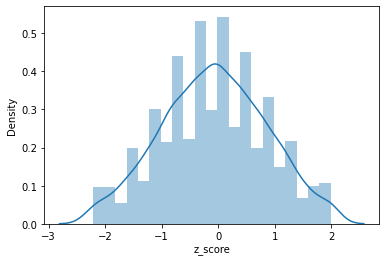

In [37]:
sns.distplot(df_knn_imp['z_score'])

In [38]:
Y = df_knn_imp['z_score']
X = df_knn_imp[['stunting_2cat','agemonr1','chsexr1','agegapr1','momeduyrsr1','hhsizer1','wi_newr1']]

# Train Test Split

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=101)

# Creating and Training the Model

In [40]:
from sklearn.linear_model import LinearRegression

In [41]:
lm = LinearRegression()

In [42]:
lm.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [43]:
results = lm.fit(X_train,Y_train)
results


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [44]:
print('Coefficients: \n',lm.coef_)

Coefficients: 
 [-0.21494835  0.01130213  0.07425269 -0.00655444  0.06377805 -0.06030654
  1.40133889]


In [45]:
predictions = lm.predict(X_test)

## Evaluating the Model

In [46]:
from sklearn import metrics

In [47]:
print('MSE: ',metrics.mean_squared_error(Y_test,predictions))

MSE:  0.658097637038208


In [48]:
print('RMSE: ',np.sqrt(metrics.mean_squared_error(Y_test,predictions)))

RMSE:  0.8112321720926803


### Residual Histogram

<AxesSubplot:xlabel='z_score', ylabel='Density'>

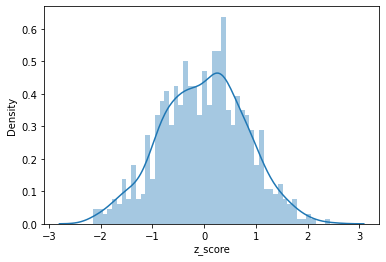

In [49]:
sns.distplot((Y_test-predictions),bins=50)

### Conclusion

In [50]:
coefficients = pd.DataFrame(lm.coef_,X.columns)
coefficients.columns = ['Coefficients']
coefficients

Coefficients
stunting_2cat     -0.214948
agemonr1           0.011302
chsexr1            0.074253
agegapr1          -0.006554
momeduyrsr1        0.063778
hhsizer1          -0.060307
wi_newr1           1.401339

In [51]:
print ('Score:', results.score(X_test, Y_test))

Score: 0.21540322754584043


# ML models global and local explanation

In [52]:
# Standard ML Models for comparison
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

# Splitting data into training/testing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error

# Distributions
import scipy

In [53]:
Y = df_knn_imp['z_score']
X = df_knn_imp[['stunting_2cat','agemonr1','chsexr1','agegapr1','momeduyrsr1','hhsizer1','wi_newr1']]

In [54]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
import time

In [55]:
def setup_plot():
    plt.rcParams["axes.grid.axis"] = "y"
    plt.rcParams["axes.grid"] = True
    plt.rcParams["legend.fontsize"] = 14
    plt.rc("grid", linestyle="dashed", color="lightgrey", linewidth=1)
    plt.rcParams["xtick.labelsize"] = 15
    plt.rcParams["ytick.labelsize"] = 15

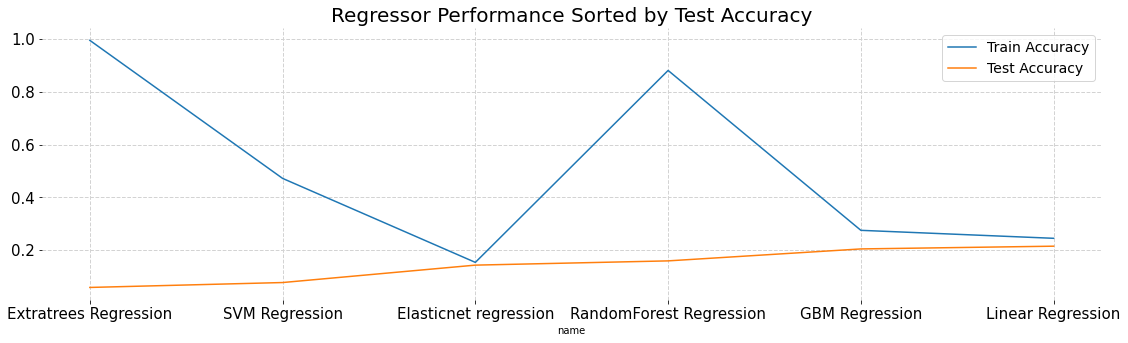

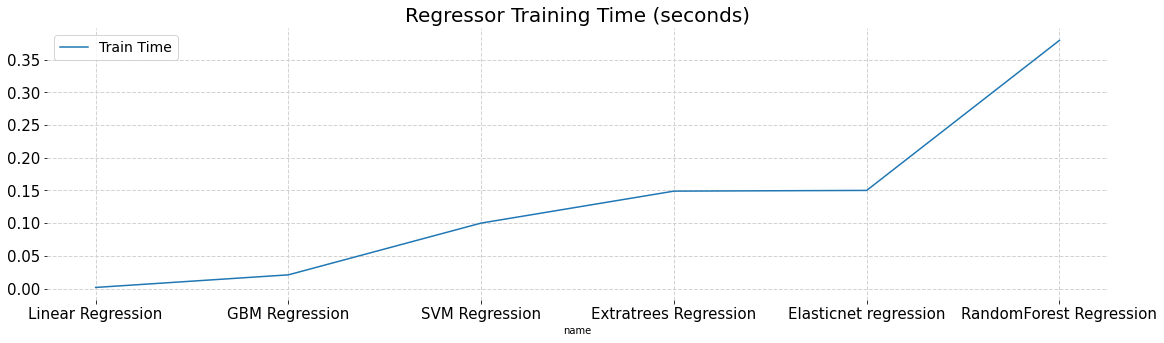

In [56]:
trained_models = [] #  keep track of all details for models we train

def train_model(model, data, labels): 
    X = data
    y = labels.values
    X_train, X_test, y_train, y_test = train_test_split(X, y,test_size= 0.3 ,  random_state=101)

    pipe = Pipeline([('clf', model["clf"])])
    start_time = time.time()
    pipe.fit(X_train, y_train)
    train_time = time.time() - start_time

    train_accuracy =  pipe.score(X_train, y_train)
    test_accuracy = pipe.score(X_test, y_test) 
    model_details = {"name": model["name"], "train_accuracy":train_accuracy, "test_accuracy":test_accuracy, "train_time": train_time, "model": pipe}
    return model_details

models = [
          {"name": "Linear Regression", "clf": LinearRegression()},
          {"name": "Elasticnet regression", "clf": ElasticNet(alpha=1.0, l1_ratio=0.5)}, 
          {"name": "RandomForest Regression", "clf": RandomForestRegressor(n_estimators=100)},
          {"name": "Extratrees Regression", "clf": ExtraTreesRegressor(n_estimators=50)},
          {"name": "SVM Regression", "clf": SVR(kernel='rbf', degree=3, C=1.0, gamma='auto')}, 
          {"name": "GBM Regression", "clf": GradientBoostingRegressor(n_estimators=20)}]

for model in models:
    model_details = train_model(model, X, Y) 
    trained_models.append(model_details)


# visualize accuracy and run time
setup_plot()
model_df = pd.DataFrame(trained_models)
model_df.sort_values("test_accuracy", inplace=True) 
ax = model_df[["train_accuracy","test_accuracy", "name"]].plot(kind="line", x="name", figsize=(19,5), title="Regressor Performance Sorted by Test Accuracy")
ax.legend(["Train Accuracy", "Test Accuracy"])
for p in ax.patches:
    ax.annotate( str( round(p.get_height(),3) ), (p.get_x() * 1.005, p.get_height() * 1.005))

ax.title.set_size(20)
plt.box(False)

model_df.sort_values("train_time", inplace=True)
ax= model_df[["train_time","name"]].plot(kind="line", x="name", figsize=(19,5), grid=True, title="Regressor Training Time (seconds)")
ax.title.set_size(20)
ax.legend(["Train Time"])
plt.box(False)

# Global Explanation - Linear Regression Coefficients

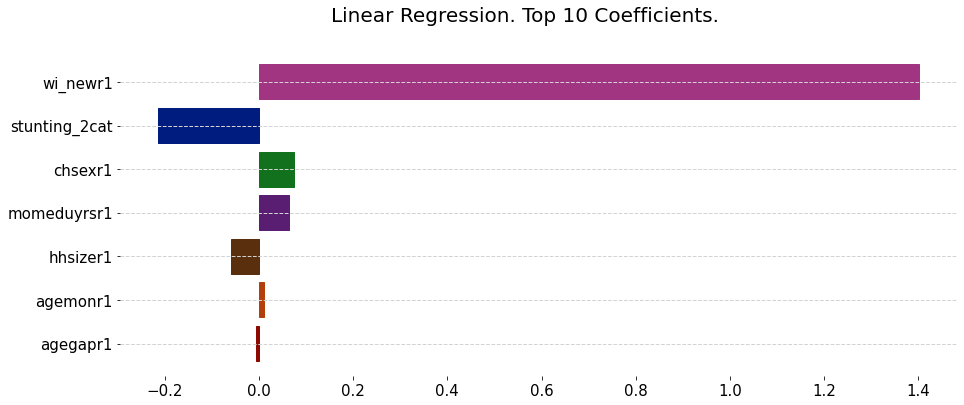

In [57]:
plt.figure(figsize=(15,6))

X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=101)

linear_reg_coeff = trained_models[0]["model"]["clf"].coef_
color_list =  sns.color_palette("dark", len(X.columns)) 
top_x = 10
# linear_reg_coeff = trained_models[0]["model"]["clf"].coef_[0]
idx = np.argsort(np.abs(linear_reg_coeff))[::-1] 
lreg_ax = plt.barh(X.columns[idx[:top_x]][::-1], linear_reg_coeff[idx[:top_x]][::-1])

for i,bar in enumerate(lreg_ax):
    bar.set_color(color_list[idx[:top_x][::-1][i]])
    plt.box(False)

lr_title = plt.suptitle("Linear Regression. Top " + str(top_x) + " Coefficients.", fontsize=20, fontweight="normal")

# Explanations via Feature Importance Scores [Tree Based Models]

Text(0.5, 0.98, 'Feature Importance for Tree Models. Top 10 Features.')

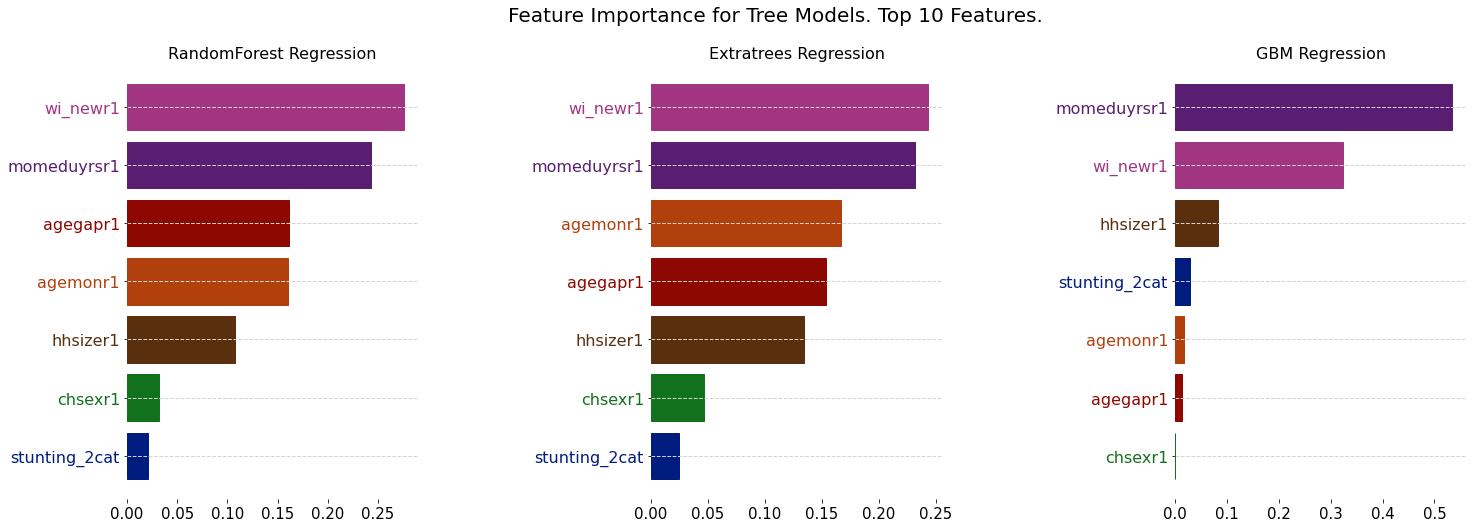

In [58]:
# Create array of tree based models and plot feature importance scores
tree_models = []
setup_plot()
color_list = sns.color_palette("dark", len(X.columns))
top_x = 10  # number of x most important features to show
for model in trained_models:
    if hasattr(model["model"]["clf"], "feature_importances_"):
        tree_models.append(
            {"name": model["name"], "fi": model["model"]["clf"].feature_importances_}
        )


fig, axs = plt.subplots(1, 3, figsize=(24, 8), facecolor="w", edgecolor="k")
fig.subplots_adjust(hspace=0.5, wspace=0.8)
axs = axs.ravel()
for i in range(len(tree_models)):
    feature_importance = tree_models[i]["fi"]
    indices = np.argsort(feature_importance)
    indices = indices[-top_x:]

    bars = axs[i].barh(
        range(len(indices)), feature_importance[indices], color="b", align="center"
    )
    axs[i].set_title(tree_models[i]["name"], fontweight="normal", fontsize=16)

    plt.sca(axs[i])
    plt.yticks(
        range(len(indices)),
        [X.columns[j] for j in indices],
        fontweight="normal",
        fontsize=16,
    )

    # print(len(plt.gca().get_yticklabels()), len(indices))
    for i, ticklabel in enumerate(plt.gca().get_yticklabels()):
        ticklabel.set_color(color_list[indices[i]])

    for i, bar in enumerate(bars):
        bar.set_color(color_list[indices[i]])
    plt.box(False)

plt.suptitle(
    "Feature Importance for Tree Models. Top " + str(top_x) + " Features.",
    fontsize=20,
    fontweight="normal",
)

# Standard Machine Learning Models Comparison

In [59]:
import random
import scipy
from scipy.io import arff
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import scikitplot as skplt
import sklearn
from sklearn import preprocessing
from sklearn import datasets 
from sklearn.impute import SimpleImputer

from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct,WhiteKernel,RBF,Matern,RationalQuadratic,ExpSineSquared,ConstantKernel,PairwiseKernel
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor

from sklearn.decomposition import PCA
from sklearn.model_selection import *
from sklearn.metrics import *

# Plot RMSE,MAE and R2

In [60]:
def plot_all(X_train, y_train, X_test, y_test, all_regrs, regr_names):
    plt.figure(figsize=(27,8))
#     plt.suptitle("Dataset: %s"%file_name, size=16)
    ax1 = plt.subplot(131)
    rmse_scores = plot_rmse_score(X_train, y_train, X_test, y_test, all_regrs, regr_names, ax1)
    ax2 = plt.subplot(132)
    ax2.set_xlim(0,1)
    r2_scores = plot_r2_score(X_train, y_train, X_test, y_test, all_regrs, regr_names,ax2)
    ax3 = plt.subplot(133)    
    mae_scores = plot_mae_score(X_train, y_train, X_test, y_test, all_regrs, regr_names,ax3)
    
#     plt.savefig(IMAGE_PATH+file.split('.')[0]+'_rmse-r2')
    plt.show()
    return rmse_scores,r2_scores,mae_scores
        
def plot_rmse_score(X_train, y_train, X_test, y_test, all_regrs, regr_names, ax):
    rmse_scores = dict()
    training_scores = []
    test_scores = []
    
    for regr, regr_name in zip(all_regrs, regr_names):  #rrmse = np.sqrt(np.mean((predictions - y_test) ** 2))
        train_preds = regr.predict(X_train)
        test_preds = regr.predict(X_test)
        train_score =  np.sqrt(np.mean((train_preds - y_train) ** 2)) #sklearn.metrics.mean_squared_error(y_train, train_preds)
        test_score =   np.sqrt(np.mean((test_preds - y_test) ** 2)) #sklearn.metrics.mean_squared_error(y_test, test_preds)
        training_scores.append(train_score)
        test_scores.append(test_score)
        rmse_scores[regr_name] = test_score
        
    N = len(all_regrs)
    ind = np.arange(N)  # the x locations for the groups
    width = 0.35       # the width of the bars: can also be len(x) sequence

    p1 = plt.barh(ind-width/2, training_scores, align='center', label='Training Set', height=width)
    p2 = plt.barh(ind+width/2, test_scores, align='center', label='Test Set', height=width)
    for i, v in enumerate(training_scores):
        plt.text(v,ind[i]-width/2.5,'%.3f'%v)
        plt.text(test_scores[i],ind[i]+width/1.5,'%.3f'%test_scores[i])
        
    plt.yticks(ind, regr_names) 
    plt.xlabel('rmse')
    plt.title('Mean Squared Error Of All Regressors')
    plt.legend(handles=[p1,p2])
    plt.gca().invert_yaxis()
    plt.gca().invert_xaxis()
#     ax.yaxis.tick_right()
    return rmse_scores

def plot_r2_score(X_train, y_train, X_test, y_test, all_regrs, regr_names, ax):
    r2_scores = dict()
    training_scores = []
    test_scores = []
    
    for regr, regr_name in zip(all_regrs, regr_names):
        train_preds = regr.predict(X_train)
        test_preds = regr.predict(X_test)
        train_score = sklearn.metrics.r2_score(y_train, train_preds)
        test_score = sklearn.metrics.r2_score(y_test, test_preds)
        training_scores.append(train_score)
        test_scores.append(test_score)
        r2_scores[regr_name] = test_score
        
    N = len(all_regrs)
    ind = np.arange(N)  # the x locations for the groups
    width = 0.35       # the width of the bars: can also be len(x) sequence

#     p1 = plt.bar(ind, training_scores, width)
#     p2 = plt.bar(ind+width, test_scores, width)
#     plt.ylabel('Scores')
#     plt.title('Scores by group and gender')
#     plt.xticks(ind, regr_names,rotation='vertical')
#     plt.yticks(np.arange(0, 1.1, 0.1))
#     plt.legend((p1[0], p2[0]), ('Training', 'Test'))

    p1 = plt.barh(ind-width/2, training_scores, align='center', label='Training Set', height=width)
    p2 = plt.barh(ind+width/2, test_scores, align='center', label='Test Set', height=width)
    for i, v in enumerate(training_scores):
        plt.text(v+0.01,ind[i]-width/2.5,'%.3f'%v)
        plt.text(max(test_scores[i],0)+0.01,ind[i]+width/1.5,'%.3f'%test_scores[i])

    plt.yticks(ind, regr_names)
    plt.xlabel('R² Score')
    plt.xticks(np.arange(0, 1.1, 0.1))
    plt.title('R² Scores Of All regressors')
    plt.legend(handles=[p1,p2])
    plt.gca().invert_yaxis()
#     plt.gca().invert_xaxis()
    ax.yaxis.tick_right()
    return r2_scores

def plot_mae_score(X_train, y_train, X_test, y_test, all_regrs, regr_names, ax):
    mae_scores = dict()
    training_scores = []
    test_scores = []
    
    for regr, regr_name in zip(all_regrs, regr_names):
        train_preds = regr.predict(X_train)
        test_preds = regr.predict(X_test)
        train_score = sklearn.metrics.mean_absolute_error(y_train, train_preds)
        test_score = sklearn.metrics.mean_absolute_error(y_test, test_preds)
        training_scores.append(train_score)
        test_scores.append(test_score)
        mae_scores[regr_name] = test_score
        
    N = len(all_regrs)
    ind = np.arange(N)  # the x locations for the groups
    width = 0.35       # the width of the bars: can also be len(x) sequence

    p1 = plt.barh(ind-width/2, training_scores, align='center', label='Training Set', height=width)
    p2 = plt.barh(ind+width/2, test_scores, align='center', label='Test Set', height=width)
    for i, v in enumerate(training_scores):
        plt.text(v,ind[i]-width/2.5,'%.3f'%v)
        plt.text(test_scores[i],ind[i]+width/1.5,'%.3f'%test_scores[i])
        
    plt.yticks(ind, regr_names) 
    plt.xlabel('MAE')
    plt.title('Mean Absolute Error Of All Regressors')
    plt.legend(handles=[p1,p2])
    plt.gca().invert_yaxis()
    plt.gca().invert_xaxis()
    ax.yaxis.tick_right()
    return mae_scores

# ML models training

In [61]:
# scipy.stats.randint(1,20)
# scipy.stats.reciprocal(1.0, 100.),
# scipy.stats.uniform(0.75, 1.25),
def train_SVR(X_train, y_train):
    print('Training SVR ...')
    svr = SVR()
    param_distributions = {
        'kernel' : [DotProduct(),WhiteKernel(),RBF(),Matern(),RationalQuadratic()],
        'C' : scipy.stats.reciprocal(1.0, 10.),
#         'epsilon' : scipy.stats.uniform(0.1, 0.5),
#         'gamma' : scipy.stats.reciprocal(0.01, 0.1),
    }
    randcv = RandomizedSearchCV(svr,param_distributions,n_iter=20,cv=3,n_jobs=-1,random_state=0)
    randcv.fit(X_train, y_train)
    return randcv

def train_DecisionTree(X_train, y_train):
    print('Training DecisionTree ...')
    tree = DecisionTreeRegressor(random_state=0)
    param_distributions = {
        'max_depth' : scipy.stats.randint(10,100)
    }
    randcv = sklearn.model_selection.RandomizedSearchCV(tree,param_distributions,n_iter=30,cv=3,n_jobs=-1,random_state=0)
    randcv.fit(X_train, y_train)
    return randcv

def train_RandomForest(X_train, y_train):
    print('Training RandomForest ...')
    forest = RandomForestRegressor(random_state=0, warm_start=True)
    param_distributions = {
        'max_depth' : scipy.stats.randint(1,50),
        'n_estimators' : scipy.stats.randint(100,200)
    }
    randcv = sklearn.model_selection.RandomizedSearchCV(forest,param_distributions,n_iter=10,cv=3,n_jobs=-1,random_state=0)
    randcv.fit(X_train, y_train)
    return randcv

def train_AdaBoost(X_train, y_train):
    print('Training AdaBoost ...')
    boost = AdaBoostRegressor(random_state=0)
    param_distributions = {
        'loss' : ['linear', 'square', 'exponential'],
        'learning_rate' : scipy.stats.uniform(0.75, 1.25),
        'n_estimators' : scipy.stats.randint(40,100)
    }
    randcv = sklearn.model_selection.RandomizedSearchCV(boost,param_distributions,n_iter=30,cv=3,n_jobs=-1,random_state=0)
    randcv.fit(X_train, y_train)
    return randcv

def train_GaussianProcess(X_train, y_train):
    print('Training GaussianProcess ...')
    alpha = 1e-9
    while(True):
        try:
            gaussian = GaussianProcessRegressor(normalize_y=True, random_state=0, optimizer=None, alpha=alpha)
            param_distributions = {
                'kernel' : [DotProduct(),WhiteKernel(),RBF(),Matern(),RationalQuadratic()],
                'n_restarts_optimizer' : scipy.stats.randint(0,10),
        #         'alpha' : scipy.stats.uniform(1e-9, 1e-8)
            }
            randcv = sklearn.model_selection.RandomizedSearchCV(gaussian,param_distributions,n_iter=5,cv=3,n_jobs=-1,random_state=0)
            randcv.fit(X_train, y_train)
            return randcv
        except:
            alpha *= 10

def train_LinearRegression(X_train,y_train):
    print('Training LinearRegression ...')
    linear = LinearRegression(n_jobs=-1)
    param_distributions = {
        'normalize' : [True,False]
    }
    randcv = sklearn.model_selection.RandomizedSearchCV(linear,param_distributions,n_iter=2,cv=3,n_jobs=-1,random_state=0)
    randcv.fit(X_train, y_train)
    return randcv

def train_NeuralNetwork(X_train, y_train):
    print('Training NeuralNetwork ...')
    nn = MLPRegressor(random_state=0, warm_start=True)
    param_distributions = {
        'activation' : ['identity', 'logistic', 'tanh', 'relu'],
        'solver' : ['lbfgs', 'adam'],
        'hidden_layer_sizes' : [(100,50,25),(200,100,50)],
        'learning_rate_init' : scipy.stats.uniform(0.001, 0.005),
        'max_iter' : scipy.stats.randint(200,500)
    }
    randcv = sklearn.model_selection.RandomizedSearchCV(nn,param_distributions,n_iter=10,cv=3,n_jobs=-1,random_state=0)
    randcv.fit(X_train, y_train)
    return randcv

In [62]:
def run_all_regrs(X_train, y_train, X_test, y_test):
    all_regrs = []
    regr_names = []

    regr1 = train_SVR(X_train, y_train)
    all_regrs.append(regr1.best_estimator_)
    regr_names.append('SVR')

    regr2 = train_DecisionTree(X_train, y_train)
    all_regrs.append(regr2.best_estimator_)
    regr_names.append('Decision Tree')

    regr3 = train_RandomForest(X_train, y_train)
    all_regrs.append(regr3.best_estimator_)
    regr_names.append('Random Forest')

    regr4 = train_AdaBoost(X_train, y_train)
    all_regrs.append(regr4.best_estimator_)
    regr_names.append('AdaBoost')

    regr5 = train_GaussianProcess(X_train, y_train)
    all_regrs.append(regr5.best_estimator_)
    regr_names.append('Gaussian Process')

    regr6 = train_LinearRegression(X_train, y_train)
    all_regrs.append(regr6.best_estimator_)
    regr_names.append('Linear Regression')

    regr7 = train_NeuralNetwork(X_train, y_train)
    all_regrs.append(regr7.best_estimator_)
    regr_names.append('NeuralNetwork')

    return all_regrs, regr_names

In [63]:
df=df_knn_imp[['stunting_2cat','height','agemonr1','chsexr1','agegapr1','momeduyrsr1','hhsizer1','wi_newr1']]

Training SVR ...
Training DecisionTree ...
Training RandomForest ...
Training AdaBoost ...
Training GaussianProcess ...
Training LinearRegression ...
Training NeuralNetwork ...


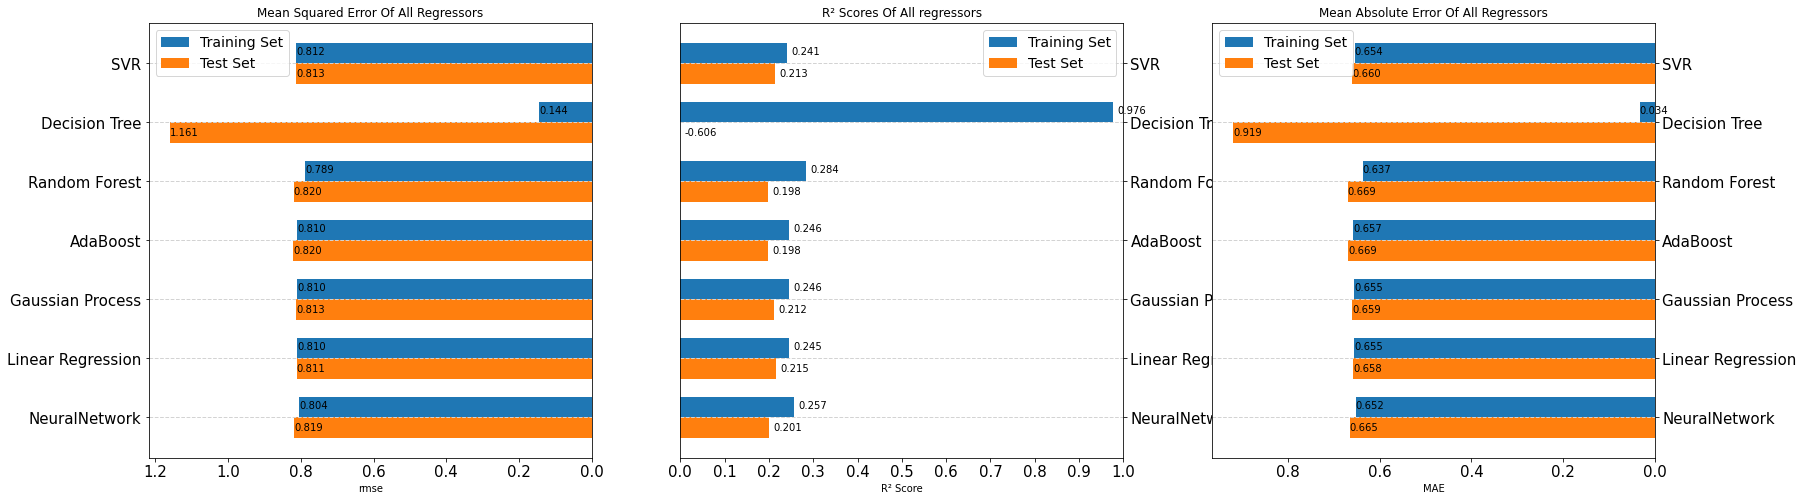

In [64]:
all_rmse = dict()
all_r2 = dict()
all_mae = dict()

# i = 0
# files=[files[i]]
 #dfs = [dfs[i]]
# dfs_test = [dfs_test[i]]



y = df_knn_imp['z_score']
X = df_knn_imp[['stunting_2cat','agemonr1','chsexr1','agegapr1','momeduyrsr1','hhsizer1','wi_newr1']]



X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)


# X_train, X_test = encode_labels(X_train,X_test)
# X_train, X_test = impute_value(X_train, X_test,'mean')
# X_train, X_test = normalize_data(X_train, X_test)
# X_train, X_test = dimension_reduction(X_train, X_test, n_components=15)

all_regrs, regr_names = run_all_regrs(X_train, y_train, X_test, y_test)
rmse, r2  ,mae             = plot_all(X_train, y_train, X_test, y_test, all_regrs, regr_names ) 

for k,v in rmse.items():
    if k not in all_rmse:
        all_rmse[k] = list()
    all_rmse[k].append(v)
for k,v in r2.items():
    if k not in all_r2:
        all_r2[k] = list()
    all_r2[k].append(v)
for k,v in mae.items():
    if k not in all_mae:
        all_mae[k] = list()
    all_mae[k].append(v)

In [65]:
for k,v in all_rmse.items():
    print('%s-rmse:'%k,["%.3f"%i for i in v])

SVR-rmse: ['0.813']
Decision Tree-rmse: ['1.161']
Random Forest-rmse: ['0.820']
AdaBoost-rmse: ['0.820']
Gaussian Process-rmse: ['0.813']
Linear Regression-rmse: ['0.811']
NeuralNetwork-rmse: ['0.819']


In [74]:
rmse

{'SVR': 0.8125929738359217,
 'Decision Tree': 1.1605834424190475,
 'Random Forest': 0.8199528472773545,
 'AdaBoost': 0.8202055715585721,
 'Gaussian Process': 0.8132141100429275,
 'Linear Regression': 0.8112321720926802,
 'NeuralNetwork': 0.8188676024665703}

In [66]:
for k,v in all_r2.items():
    print('%s-r2:'%k,["%.3f"%i for i in v])

SVR-r2: ['0.213']
Decision Tree-r2: ['-0.606']
Random Forest-r2: ['0.198']
AdaBoost-r2: ['0.198']
Gaussian Process-r2: ['0.212']
Linear Regression-r2: ['0.215']
NeuralNetwork-r2: ['0.201']


In [67]:
for k,v in all_mae.items():
    print('%s-mae:'%k,["%.3f"%i for i in v])

SVR-mae: ['0.660']
Decision Tree-mae: ['0.919']
Random Forest-mae: ['0.669']
AdaBoost-mae: ['0.669']
Gaussian Process-mae: ['0.659']
Linear Regression-mae: ['0.658']
NeuralNetwork-mae: ['0.665']


In [68]:
for k,v in all_r2.items():
    print('%s avg r2: %.2f, avg rmse: %.2f'%(k,np.mean(v),np.mean(all_rmse[k])))

SVR avg r2: 0.21, avg rmse: 0.81
Decision Tree avg r2: -0.61, avg rmse: 1.16
Random Forest avg r2: 0.20, avg rmse: 0.82
AdaBoost avg r2: 0.20, avg rmse: 0.82
Gaussian Process avg r2: 0.21, avg rmse: 0.81
Linear Regression avg r2: 0.22, avg rmse: 0.81
NeuralNetwork avg r2: 0.20, avg rmse: 0.82
